In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

import os
print(os.listdir("../input"))

['500-person-gender-height-weight-bodymassindex']


In [2]:
BMI = pd.read_csv('../input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv')

In [3]:
BMI.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [4]:
gender_label = LabelEncoder()
BMI['Gender'] = gender_label.fit_transform(BMI['Gender'])

In [5]:
bins = (-1,0,1,2,3,4,5)
health_status = ['Extremely Underweight','Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese']
BMI['Index'] = pd.cut(BMI['Index'], bins = bins, labels = health_status)
BMI['Index'].value_counts()

Extremely Obese          198
Obese                    130
Normal                    69
Overweight                68
Underweight               22
Extremely Underweight     13
Name: Index, dtype: int64

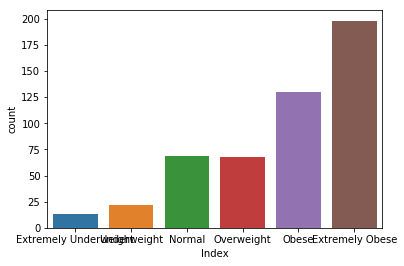

In [6]:
sns.countplot(BMI['Index'])

In [7]:
BMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null int64
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null category
dtypes: category(1), int64(3)
memory usage: 12.5 KB


In [8]:
BMI['Index']

0                Obese
1               Normal
2                Obese
3           Overweight
4           Overweight
            ...       
495    Extremely Obese
496              Obese
497    Extremely Obese
498    Extremely Obese
499    Extremely Obese
Name: Index, Length: 500, dtype: category
Categories (6, object): [Extremely Underweight < Underweight < Normal < Overweight < Obese < Extremely Obese]

In [9]:
BMI.tail()

,Gender,Height,Weight,Index
495,0,150,153,Extremely Obese
496,0,184,121,Obese
497,0,141,136,Extremely Obese
498,1,150,95,Extremely Obese
499,1,173,131,Extremely Obese


In [10]:
X = BMI.drop('Index', axis = 1)
y = BMI['Index']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier

In [13]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [14]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

                       precision    recall  f1-score   support

      Extremely Obese       0.93      0.95      0.94        40
Extremely Underweight       1.00      1.00      1.00         1
               Normal       0.85      0.73      0.79        15
                Obese       0.78      0.86      0.82        29
           Overweight       0.60      0.60      0.60        10
          Underweight       1.00      0.60      0.75         5

             accuracy                           0.84       100
            macro avg       0.86      0.79      0.82       100
         weighted avg       0.84      0.84      0.84       100

[[38  0  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 11  1  3  0]
 [ 3  0  0 25  1  0]
 [ 0  0  0  4  6  0]
 [ 0  0  2  0  0  3]]


# SVM Classifier

In [15]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [16]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

                       precision    recall  f1-score   support

      Extremely Obese       0.97      0.95      0.96        40
Extremely Underweight       0.00      0.00      0.00         1
               Normal       0.85      0.73      0.79        15
                Obese       0.90      0.97      0.93        29
           Overweight       0.73      0.80      0.76        10
          Underweight       0.75      0.60      0.67         5

             accuracy                           0.88       100
            macro avg       0.70      0.67      0.68       100
         weighted avg       0.89      0.88      0.88       100

[[38  0  0  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0 11  1  3  0]
 [ 1  0  0 28  0  0]
 [ 0  0  2  0  8  0]
 [ 0  2  0  0  0  3]]


# Neural Network

In [17]:
mlpc = MLPClassifier(hidden_layer_sizes=(3,3,3), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

                       precision    recall  f1-score   support

      Extremely Obese       0.83      1.00      0.91        40
Extremely Underweight       0.00      0.00      0.00         1
               Normal       0.25      0.13      0.17        15
                Obese       0.91      0.72      0.81        29
           Overweight       0.43      0.90      0.58        10
          Underweight       0.00      0.00      0.00         5

             accuracy                           0.72       100
            macro avg       0.40      0.46      0.41       100
         weighted avg       0.68      0.72      0.68       100

[[40  0  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  2  1 12  0]
 [ 8  0  0 21  0  0]
 [ 0  0  0  1  9  0]
 [ 0  0  5  0  0  0]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Test

In [19]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.84

In [20]:
Xnew = [[1,175,35]] #Enter New Value: [Gender, Height, Weight]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array(['Underweight'], dtype=object)